<a href="https://colab.research.google.com/github/dixitmj/deep-learning_Image_recognition-/blob/main/Image_Reconigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import pathlib


from PIL import Image
from pathlib import Path
from tensorflow.keras import layers,models

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Update the path to the "vehicle_photos" folder in your Google Drive
loaded_data = Path("/content/drive/My Drive/DL")

# Initialize a counter to keep track of the total number of images
total_image_count = 0

# Check if there are any subfolders (flower categories)
vehicle_categories = list(loaded_data.glob('*'))
if len(vehicle_categories) > 0:
    for vehicle_category in vehicle_categories:
        vehicle_images = list(vehicle_category.glob('*.jpg')) + list(vehicle_category.glob('*.png')) + list(vehicle_category.glob('*.jpeg'))
        if len(vehicle_images) > 0:
            total_image_count += len(vehicle_images)
    print(f"Total number of vehicle images found: {total_image_count}")
else:
    print("No vehicle categories (subfolders) found in the directory.")

set_height, set_width = 180, 180
batch_size=32

Total number of vehicle images found: 1766


In [12]:
#Training Setup
training_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="training",
    validation_split = 0.25,
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="validation",  # Use "validation" for the validation subset
    validation_split=0.25,  # Adjust this value as needed
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
vehicle_classes = training_images.class_names
print(vehicle_classes)
dataset_classes = 2
from tensorflow.keras.models import Sequential
model=Sequential([])

Found 1766 files belonging to 2 classes.
Using 1325 files for training.
Found 1766 files belonging to 2 classes.
Using 441 files for validation.
['Bikes', 'Cars']


In [9]:
import matplotlib.pyplot as plt

def create_cnn_model(dropout_rate):
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(set_height, set_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),  # Add dropout layer with the specified rate
        layers.Dense(dataset_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model


In [14]:
#Define a list of dropout rates to try
dropout_rates = [0.0, 0.2, 0.4]
epochs=10
# Store training history for each model
training_histories = []

# Train models with different dropout rates
for dropout_rate in dropout_rates:
    print(f"Training model with dropout rate: {dropout_rate}")
    model = create_cnn_model(dropout_rate)
    history = model.fit(
        training_images,
        validation_data=validation_images,
        epochs=epochs
    )
    training_histories.append((dropout_rate,history))


Training model with dropout rate: 0.0
Epoch 1/10
42/42 [==============================] - 59s 1s/step - loss: 0.5247 - accuracy: 0.7472 - val_loss: 0.4792 - val_accuracy: 0.8163
Epoch 2/10
42/42 [==============================] - 58s 1s/step - loss: 0.2244 - accuracy: 0.9200 - val_loss: 0.2314 - val_accuracy: 0.9048
Epoch 3/10
42/42 [==============================] - 57s 1s/step - loss: 0.0870 - accuracy: 0.9713 - val_loss: 0.1078 - val_accuracy: 0.9592
Epoch 4/10
42/42 [==============================] - 55s 1s/step - loss: 0.0466 - accuracy: 0.9842 - val_loss: 0.0998 - val_accuracy: 0.9705
Epoch 5/10
42/42 [==============================] - 52s 1s/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0722 - val_accuracy: 0.9683
Epoch 6/10
42/42 [==============================] - 52s 1s/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0606 - val_accuracy: 0.9773
Epoch 7/10
42/42 [==============================] - 56s 1s/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0503 - val

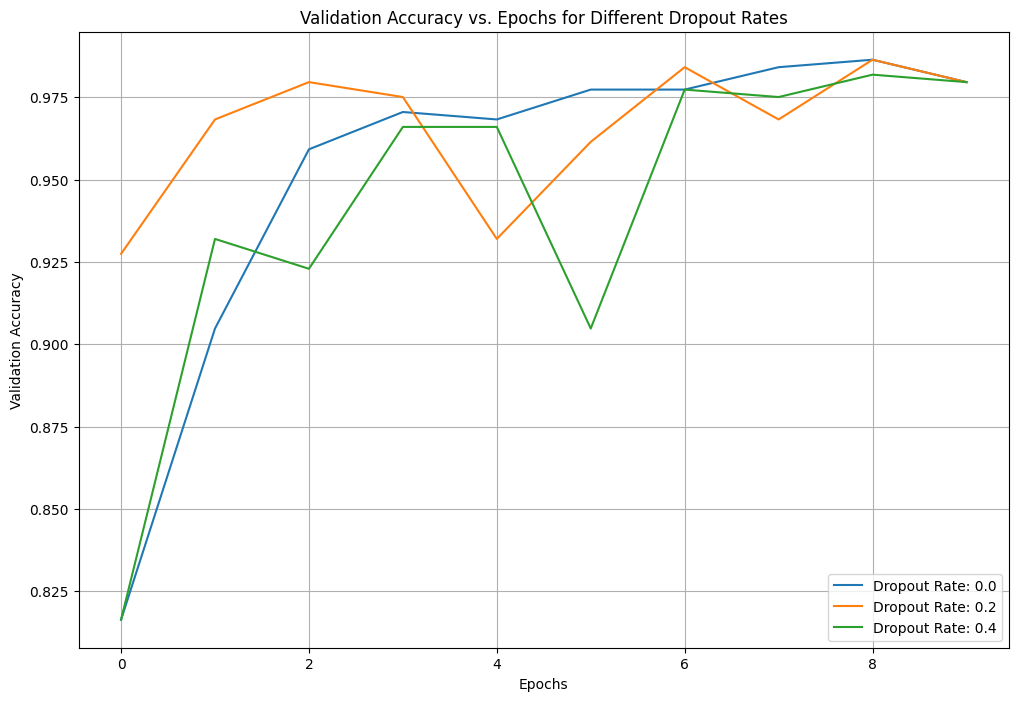

In [17]:
# Visualize the training history for different dropout rates
plt.figure(figsize=(12, 8))
for dropout_rate, history in training_histories:
    plt.plot(history.history['val_accuracy'], label=f'Dropout Rate: {dropout_rate}')
plt.title('Validation Accuracy vs. Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()